**Import Libraries**

In [0]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [0]:
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Let’s read train and test datasets
train  = pd.read_csv('/content/drive/My Drive/Twitter Sentiment Analysis/train.csv') 
test = pd.read_csv('/content/drive/My Drive/Twitter Sentiment Analysis/test.csv')

In [5]:
# Let’s check out a few non ADR tweets.

train[train['ADR_label'] == 0].head(5)

,UserId,TweetId,Tweet,ADR_label
4622,11672959,610789,One of the cases reviewed went to jury trial and the record of that case is in the public domain.,0
4623,11688826,507810,"About 44% of the patients had gastric adenocarcinoma, and 82% had received mitomycin C.",0
4624,11688826,661449,"Though a considerable number of such lesions are cutaneous in origin, melanoma has rarely been reported.",0
4625,11688826,265278,"CONCLUSIONS: Patients most commonly affected by ICD, such as pathologic gambling and hypersexuality, are males who develop PD at a younger age, and those with a previous history of mood disorder, ...",0
4626,11688826,600979,"Besides those manifestations, the patient also showed mucocutaneous lesions that were both clinically and histologically indistinguishable from those of pustular psoriasis.",0


In [6]:
# Let’s check out a few non NON ADR tweets.

train[train['ADR_label'] == 1].head(5)

,UserId,TweetId,Tweet,ADR_label
0,11212595,370774,"The first known report of quetiapine exacerbating OCS in a 43-year-old man with obsessive-compulsive disorder (OCD), trichotillomania, delusional disorder and bipolar II disorder is presented.",1
1,11215836,600054,He was diagnosed with possible serotonin syndrome; his symptoms resolved after clomipramine was stopped but before clozapine was restarted eight days later.,1
2,11215836,166132,OBJECTIVE: To report on the possible development of serotonin syndrome in a patient receiving clomipramine after clozapine was withdrawn from the treatment regimen.,1
3,11215836,174015,OBJECTIVE: To report on the possible development of serotonin syndrome in a patient receiving clomipramine after clozapine was withdrawn from the treatment regimen.,1
4,11215836,734871,Possible serotonin syndrome associated with clomipramine after withdrawal of clozapine.,1


In [7]:
# Let’s check dimensions of the train and test dataset.
print(train.shape) 
print(test.shape)

#Let’s have a glimpse at label-distribution in the train dataset.
train["ADR_label"].value_counts()

(18813, 4)
(4703, 4)


0    13471
1     5342
Name: ADR_label, dtype: int64

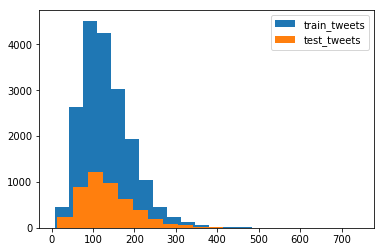

In [8]:
# Now we will check the distribution of length of the tweets, in terms of words, in both train and test data.

length_train = train['Tweet'].str.len() 
length_test = test['Tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

In [9]:
combi = train.append(test, ignore_index=True) 
combi.shape

(23516, 4)

In [0]:
# Given below is a user-defined function to remove unwanted text patterns from the tweets.

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [11]:
# 1.Removing Twitter Handles (@user)

combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['Tweet'], "@[\w]*") 
combi.head()

,UserId,TweetId,Tweet,ADR_label,tidy_tweet
0,11212595,370774,"The first known report of quetiapine exacerbating OCS in a 43-year-old man with obsessive-compulsive disorder (OCD), trichotillomania, delusional disorder and bipolar II disorder is presented.",1,"The first known report of quetiapine exacerbating OCS in a 43-year-old man with obsessive-compulsive disorder (OCD), trichotillomania, delusional disorder and bipolar II disorder is presented."
1,11215836,600054,He was diagnosed with possible serotonin syndrome; his symptoms resolved after clomipramine was stopped but before clozapine was restarted eight days later.,1,He was diagnosed with possible serotonin syndrome; his symptoms resolved after clomipramine was stopped but before clozapine was restarted eight days later.
2,11215836,166132,OBJECTIVE: To report on the possible development of serotonin syndrome in a patient receiving clomipramine after clozapine was withdrawn from the treatment regimen.,1,OBJECTIVE: To report on the possible development of serotonin syndrome in a patient receiving clomipramine after clozapine was withdrawn from the treatment regimen.
3,11215836,174015,OBJECTIVE: To report on the possible development of serotonin syndrome in a patient receiving clomipramine after clozapine was withdrawn from the treatment regimen.,1,OBJECTIVE: To report on the possible development of serotonin syndrome in a patient receiving clomipramine after clozapine was withdrawn from the treatment regimen.
4,11215836,734871,Possible serotonin syndrome associated with clomipramine after withdrawal of clozapine.,1,Possible serotonin syndrome associated with clomipramine after withdrawal of clozapine.


In [12]:
# 2.Removing Punctuations, Numbers, and Special Characters

combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head(5)

,UserId,TweetId,Tweet,ADR_label,tidy_tweet
0,11212595,370774,"The first known report of quetiapine exacerbating OCS in a 43-year-old man with obsessive-compulsive disorder (OCD), trichotillomania, delusional disorder and bipolar II disorder is presented.",1,The first known report of quetiapine exacerbating OCS in a year old man with obsessive compulsive disorder OCD trichotillomania delusional disorder and bipolar II disorder is presented
1,11215836,600054,He was diagnosed with possible serotonin syndrome; his symptoms resolved after clomipramine was stopped but before clozapine was restarted eight days later.,1,He was diagnosed with possible serotonin syndrome his symptoms resolved after clomipramine was stopped but before clozapine was restarted eight days later
2,11215836,166132,OBJECTIVE: To report on the possible development of serotonin syndrome in a patient receiving clomipramine after clozapine was withdrawn from the treatment regimen.,1,OBJECTIVE To report on the possible development of serotonin syndrome in a patient receiving clomipramine after clozapine was withdrawn from the treatment regimen
3,11215836,174015,OBJECTIVE: To report on the possible development of serotonin syndrome in a patient receiving clomipramine after clozapine was withdrawn from the treatment regimen.,1,OBJECTIVE To report on the possible development of serotonin syndrome in a patient receiving clomipramine after clozapine was withdrawn from the treatment regimen
4,11215836,734871,Possible serotonin syndrome associated with clomipramine after withdrawal of clozapine.,1,Possible serotonin syndrome associated with clomipramine after withdrawal of clozapine


In [13]:
# 3.Removing Short Words

combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,UserId,TweetId,Tweet,ADR_label,tidy_tweet
0,11212595,370774,"The first known report of quetiapine exacerbating OCS in a 43-year-old man with obsessive-compulsive disorder (OCD), trichotillomania, delusional disorder and bipolar II disorder is presented.",1,first known report quetiapine exacerbating year with obsessive compulsive disorder trichotillomania delusional disorder bipolar disorder presented
1,11215836,600054,He was diagnosed with possible serotonin syndrome; his symptoms resolved after clomipramine was stopped but before clozapine was restarted eight days later.,1,diagnosed with possible serotonin syndrome symptoms resolved after clomipramine stopped before clozapine restarted eight days later
2,11215836,166132,OBJECTIVE: To report on the possible development of serotonin syndrome in a patient receiving clomipramine after clozapine was withdrawn from the treatment regimen.,1,OBJECTIVE report possible development serotonin syndrome patient receiving clomipramine after clozapine withdrawn from treatment regimen
3,11215836,174015,OBJECTIVE: To report on the possible development of serotonin syndrome in a patient receiving clomipramine after clozapine was withdrawn from the treatment regimen.,1,OBJECTIVE report possible development serotonin syndrome patient receiving clomipramine after clozapine withdrawn from treatment regimen
4,11215836,734871,Possible serotonin syndrome associated with clomipramine after withdrawal of clozapine.,1,Possible serotonin syndrome associated with clomipramine after withdrawal clozapine


In [14]:
# 4.Text Normalization

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0    [first, known, report, quetiapine, exacerbating, year, with, obsessive, compulsive, disorder, trichotillomania, delusional, disorder, bipolar, disorder, presented]
1                   [diagnosed, with, possible, serotonin, syndrome, symptoms, resolved, after, clomipramine, stopped, before, clozapine, restarted, eight, days, later]
2               [OBJECTIVE, report, possible, development, serotonin, syndrome, patient, receiving, clomipramine, after, clozapine, withdrawn, from, treatment, regimen]
3               [OBJECTIVE, report, possible, development, serotonin, syndrome, patient, receiving, clomipramine, after, clozapine, withdrawn, from, treatment, regimen]
4                                                                          [Possible, serotonin, syndrome, associated, with, clomipramine, after, withdrawal, clozapine]
Name: tidy_tweet, dtype: object

In [0]:
# Now we can normalize the tokenized tweets

from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [0]:
# Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet

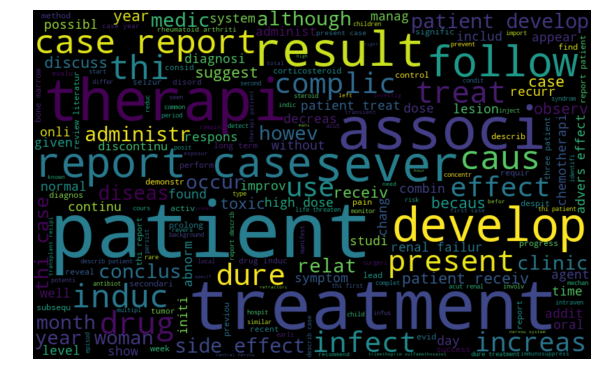

In [17]:
# Let’s visualize all the words our data using the wordcloud plot.

all_words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

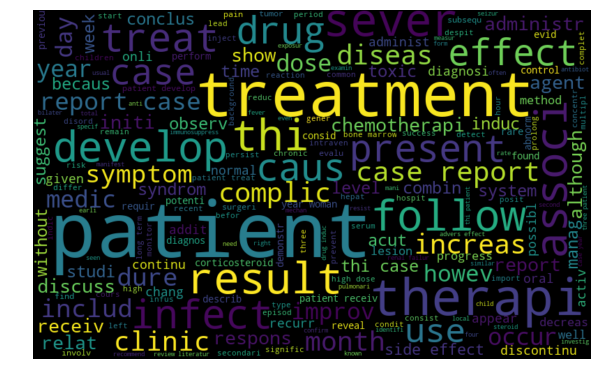

In [18]:
# Words in non NON ADR tweets

normal_words =' '.join([text for text in combi['tidy_tweet'][combi['ADR_label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

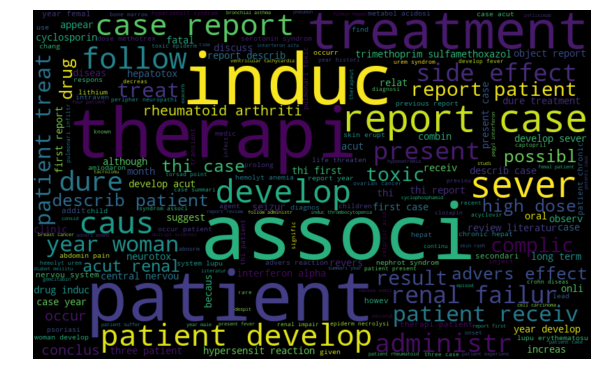

In [19]:
# ADR Tweets

negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['ADR_label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim
from gensim import models
from gensim.models import Word2Vec

In [21]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(combi['tidy_tweet']) 
bow.shape

(23516, 1000)

In [22]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet']) 
tfidf.shape

(23516, 1000)

In [0]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 


In [24]:
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(5201554, 5967100)

In [25]:
model_w2v.wv.most_similar(positive="patient")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('thousand', 0.530678391456604),
 ('dysthymia', 0.5240269899368286),
 ('azotem', 0.5102176070213318),
 ('pouchiti', 0.5042566061019897),
 ('commentari', 0.5030736923217773),
 ('milieu', 0.5026645660400391),
 ('antigenaemia', 0.4983288049697876),
 ('leucocytopenia', 0.4955674111843109),
 ('neglig', 0.4883931279182434),
 ('palmopustular', 0.48507222533226013)]

In [26]:
model_w2v.wv.most_similar(positive="treatment")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('therapi', 0.5206416845321655),
 ('palmopustular', 0.47660118341445923),
 ('lieu', 0.4694266617298126),
 ('treat', 0.46935635805130005),
 ('peyroni', 0.468345582485199),
 ('dihydrochlorid', 0.4651918411254883),
 ('chlordeoxyadenosin', 0.4626512825489044),
 ('immunosuppressor', 0.4611884653568268),
 ('candesartan', 0.46054553985595703),
 ('nonrespond', 0.4597683250904083)]

In [27]:
model_w2v['toxic']

array([-5.31037092e-01,  3.61016393e-01,  2.85470217e-01, -1.38223886e-01,
       -4.60794428e-03, -2.37499684e-01,  9.29766446e-02, -3.60084176e-01,
       -1.81834418e-02,  4.77983505e-01, -3.85461956e-01, -5.37414849e-01,
       -5.40691949e-02,  3.78021181e-01, -5.74474484e-02,  6.44407868e-02,
       -5.49080968e-01, -5.69252372e-01,  5.48327863e-01, -4.36318487e-01,
        2.03057274e-01, -2.49885172e-01, -6.29012764e-01, -5.69066644e-01,
       -4.11360979e-01, -4.49943453e-01, -3.22379284e-02, -1.30074412e-01,
        3.34105849e-01, -1.44940868e-01,  2.98658907e-01,  1.18140094e-01,
        4.26952064e-01, -6.94347918e-01,  7.78681561e-02, -5.91070175e-01,
        5.10446548e-01,  3.35423946e-01, -2.64258891e-01,  2.28341505e-01,
        5.49260497e-01,  2.94421852e-01,  3.26233536e-01,  9.76368785e-01,
        5.42115457e-02,  3.96373630e-01, -2.28049710e-01, -9.86402556e-02,
       -4.63396497e-02,  4.99087632e-01,  7.95978755e-02,  3.24367523e-01,
       -2.67113596e-01, -

In [28]:
len(model_w2v['toxic']) #The length of the vector is 200

200

In [0]:
# Preparing Vectors for Tweets
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary 
          continue
    if count != 0:
        vec /= count
    return vec

In [0]:
# Preparing word2vec feature set…

wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays) 
    wordvec_df.shape  

In [0]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

In [0]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [33]:
# Now let’s train a doc2vec model.

model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model                                   
dm_mean=1, # dm = 1 for using mean of the context word vectors                                  
size=200, # no. of desired features                                  
window=5, # width of the context window                                  
negative=7, # if > 0 then negative sampling will be used                                 
min_count=5, # Ignores all words with total frequency lower than 2.                                  
workers=3, # no. of cores                                  
alpha=0.1, # learning rate                                  
seed = 23) 
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 23516/23516 [00:00<00:00, 2058418.78it/s]


In [34]:
# Preparing doc2vec Feature Set

docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(23516, 200)

**Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [36]:
# We will first try to fit the logistic regression model on the Bag-of_Words (BoW) features.

# Extracting train and test BoW features 
train_bow = bow[:18813,:] 
test_bow = bow[18813:,:]
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['ADR_label'], random_state=42,test_size=0.30)
lreg = LogisticRegression() 
# training the model 
lreg.fit(xtrain_bow, ytrain) 
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
print(f1_score(yvalid, prediction_int)) # calculating f1 score for the validation set
print(accuracy_score(yvalid, prediction_int)) # calculating accuracy score for the validation set

0.7049235993208829
0.8460311835577604


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
# Now let’s make predictions for the test dataset and create a submission file.

test_pred = lreg.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.5 
test_pred_int = test_pred_int.astype(np.int) 
test_Actual = test['ADR_label'] 
print(accuracy_score(test_Actual, test_pred_int)) # calculating accuracy score for the test set

0.8107590899425898


In [38]:
# TF-IDF Features

# We’ll follow the same steps as above, but now for the TF-IDF feature set.

train_tfidf = tfidf[:18813,:] 
test_tfidf = tfidf[18813:,:] 
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.5 
prediction_int = prediction_int.astype(np.int) 
print(f1_score(yvalid, prediction_int)) # calculating f1 score for the validation set
print(accuracy_score(yvalid, prediction_int)) # calculating accuracy score for the validation set


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6846071044133476
0.8442593905031892


In [39]:
test_pred = lreg.predict_proba(test_tfidf) 
test_pred_int = test_pred[:,1] >= 0.5 
test_pred_int = test_pred_int.astype(np.int) 
test_Actual = test['ADR_label'] 
print(accuracy_score(test_Actual, test_pred_int)) # calculating accuracy score for the test set

0.7984265362534553


In [40]:
# Word2Vec Features

train_w2v = wordvec_df.iloc[:18813,:]
test_w2v = wordvec_df.iloc[18813:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.5 
prediction_int = prediction_int.astype(np.int) 
print(f1_score(yvalid, prediction_int)) # calculating f1 score for the validation set
print(accuracy_score(yvalid, prediction_int)) # calculating accuracy score for the validation set

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6420793818054092
0.819454287739192


In [41]:
test_pred = lreg.predict_proba(test_w2v) 
test_pred_int = test_pred[:,1] >= 0.5 
test_pred_int = test_pred_int.astype(np.int) 
test_Actual = test['ADR_label'] 
print(accuracy_score(test_Actual, test_pred_int)) # calculating accuracy score for the test set

0.7841803104401446


In [42]:
# Doc2Vec Features

train_d2v = docvec_df.iloc[:18813,:] 
test_d2v = docvec_df.iloc[18813:,:] 
xtrain_d2v = train_d2v.iloc[ytrain.index,:] 
xvalid_d2v = train_d2v.iloc[yvalid.index,:]
lreg.fit(xtrain_d2v, ytrain) 
prediction = lreg.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.5 
prediction_int = prediction_int.astype(np.int) 
print(f1_score(yvalid, prediction_int)) # calculating f1 score for the validation set
print(accuracy_score(yvalid, prediction_int)) # calculating accuracy score for the validation set

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.2890226956924502
0.7280297661233168


In [43]:
test_pred = lreg.predict_proba(test_d2v) 
test_pred_int = test_pred[:,1] >= 0.5 
test_pred_int = test_pred_int.astype(np.int) 
test_Actual = test['ADR_label'] 
print(accuracy_score(test_Actual, test_pred_int)) # calculating accuracy score for the test set

0.7329364235594301


**Support Vector Machine (SVM)**


In [0]:
from sklearn import svm

In [45]:
# Bag-of-Words Features

svc = svm.SVC(kernel='linear', C=10, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.5 
prediction_int = prediction_int.astype(np.int) 
print(f1_score(yvalid, prediction_int)) # calculating f1 score for the validation set
print(accuracy_score(yvalid, prediction_int)) # calculating accuracy score for the validation set

0.6965589155370177
0.845322466335932


In [46]:
# Again let’s make predictions for the test dataset and create another submission file.

test_pred = svc.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.5 
test_pred_int = test_pred_int.astype(np.int) 
print(accuracy_score(test['ADR_label'], test_pred_int)) # calculating accuracy score for the test set


0.8026791409738465


In [47]:
# TF-IDF Features

svc = svm.SVC(kernel='linear', C=10, probability=True).fit(xtrain_tfidf, ytrain) 
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.5 
prediction_int = prediction_int.astype(np.int) 
print(f1_score(yvalid, prediction_int)) # calculating f1 score for the validation set
print(accuracy_score(yvalid, prediction_int)) # calculating accuracy score for the validation set

0.7050754458161868
0.8476257973068746


In [48]:
test_pred = svc.predict_proba(test_tfidf) 
test_pred_int = test_pred[:,1] >= 0.5 
test_pred_int = test_pred_int.astype(np.int) 
print(accuracy_score(test['ADR_label'], test_pred_int)) # calculating accuracy score for the test set


0.80586859451414


In [49]:
# Word2Vec Features

svc = svm.SVC(kernel='linear', C=10, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.5
prediction_int = prediction_int.astype(np.int) 
print(f1_score(yvalid, prediction_int)) # calculating f1 score for the validation set
print(accuracy_score(yvalid, prediction_int)) # calculating accuracy score for the validation set

0.6470793983910459
0.8212260807937632


In [50]:
test_pred = svc.predict_proba(test_w2v) 
test_pred_int = test_pred[:,1] >= 0.5 
test_pred_int = test_pred_int.astype(np.int) 
print(accuracy_score(test['ADR_label'], test_pred_int)) # calculating accuracy score for the test set

0.7909844779927706


In [51]:
# Doc2Vec Features

svc = svm.SVC(kernel='linear', C=10, probability=True).fit(xtrain_d2v, ytrain) 
prediction = svc.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.5 
prediction_int = prediction_int.astype(np.int) 
print(f1_score(yvalid, prediction_int)) # calculating f1 score for the validation set
print(accuracy_score(yvalid, prediction_int)) # calculating accuracy score for the validation set

0.12910406232609906
0.7227143869596031


In [52]:
test_pred = svc.predict_proba(test_d2v) 
test_pred_int = test_pred[:,1] >= 0.5 
test_pred_int = test_pred_int.astype(np.int) 
print(accuracy_score(test['ADR_label'], test_pred_int)) # calculating accuracy score for the test set

0.6963640229640655


**Logistic Regression Model is Good For the above Classification.**